In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Regression
import statsmodels.api as sm

# Plots
import matplotlib.pyplot as plt

# Handle Files
import pickle
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from capm_toolkit import compute_daily_returns
from capm_toolkit import capm_regression
from factors_toolkit import fama_macbeth_significance_test

In [2]:
# import descriptors

with open(r'..\additional_data\factors.pkl', 'rb') as f:
    factors_dict = pickle.load(f)

factors_dict.keys()

dict_keys(['mask', 'mktcap', 'size_factor', 'value_factor', 'momentum_factor', 'residual_vol_factor', 'beta_factor'])

In [3]:
# Create the dataframes
size_factor = factors_dict['size_factor'].loc['2016':]
value_factor = factors_dict['value_factor'].loc['2016':]
momentum_factor = factors_dict['momentum_factor'].loc['2016':]
residual_vol_factor = factors_dict['residual_vol_factor'].loc['2016':]
beta_factor = factors_dict['beta_factor'].loc['2016':]

In [4]:
print(size_factor.shape)
print(value_factor.shape)
print(momentum_factor.shape)
print(residual_vol_factor.shape)
print(beta_factor.shape)

(2220, 399)
(2220, 399)
(2220, 399)
(2220, 399)
(2220, 399)


In [5]:
# Check NANs
size_factor.isna().sum().sort_values(ascending=False)

MTCH    1127
LW       217
DELL     171
FTV      126
TPL        3
        ... 
FFIV       0
FE         0
FDX        0
FDS        0
ZTS        0
Length: 399, dtype: int64

In [6]:
# Check NANs
value_factor.isna().sum().sort_values(ascending=False)

AWK     335
LW      257
DELL    171
FTV     114
TPL       3
       ... 
FI        0
FFIV      0
FE        0
FDX       0
ZTS       0
Length: 399, dtype: int64

In [7]:
# Check NANs
momentum_factor.isna().sum().sort_values(ascending=False)

A       0
OKE     0
O       0
NWSA    0
NWS     0
       ..
FE      0
FDX     0
FDS     0
FCX     0
ZTS     0
Length: 399, dtype: int64

In [8]:
# Check NANs
residual_vol_factor.isna().sum().sort_values(ascending=False)

LW      4
DELL    2
FTV     2
REGN    1
NRG     0
       ..
FFIV    0
FE      0
FDX     0
FDS     0
ZTS     0
Length: 399, dtype: int64

In [9]:
# Check NANs
beta_factor.isna().sum().sort_values(ascending=False)

A       18
OKE     18
O       18
NWSA    18
NWS     18
        ..
FE      18
FDX     18
FDS     18
FCX     18
ZTS     18
Length: 399, dtype: int64

### Get Returns Data ###

In [10]:
# Get the important data for the Risk-Free Rate
rfr = pd.read_csv(r"..\additional_data\rfr.csv")
rfr = rfr.set_index('Date')
rfr.index = pd.to_datetime(rfr.index, dayfirst=True)

# Create the data
daily_rfr = compute_daily_returns(rfr['risk_free_rate'])

daily_rfr

Date
2015-01-01         NaN
2015-01-02    0.000058
2015-01-05    0.000056
2015-01-06    0.000054
2015-01-07    0.000054
                ...   
2025-02-14    0.000121
2025-02-17         NaN
2025-02-18    0.000124
2025-02-19    0.000123
2025-02-20    0.000122
Name: risk_free_rate, Length: 2646, dtype: float64

In [11]:
mask = factors_dict['mask']

mask

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2015-01-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2015-01-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2015-01-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2015-01-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
# Create the DataFrames inside a dictionary
universe = {}

# Create the Loop
for ticker in mask.columns:
    # Create the DataFrame
    df = pd.read_csv(r'..\stocks\{}.csv'.format(ticker))
    df = df.set_index('Date')                               # Set Index
    df.index = pd.to_datetime(df.index)                     # Index to date time
    df = df['Adjusted_close']                                      # Use the variables we need
    df.columns = ['adj_close']                                      # Rename columns
    
    # Store Dataframe
    universe[ticker] = df.loc['2016':]
    
    print(f'{ticker} is ready.')

A is ready.
AAPL is ready.
ABBV is ready.
ABT is ready.
ADBE is ready.
ADI is ready.
ADM is ready.
ADP is ready.
ADSK is ready.
AEE is ready.
AEP is ready.
AES is ready.
AFL is ready.
AIG is ready.
AIZ is ready.
AJG is ready.
AKAM is ready.
ALB is ready.
ALGN is ready.
ALL is ready.
AMAT is ready.
AMD is ready.
AME is ready.
AMGN is ready.
AMP is ready.
AMT is ready.
AMZN is ready.
ANET is ready.
ANSS is ready.
AOS is ready.
APA is ready.
APD is ready.
APH is ready.
APO is ready.
ARE is ready.
AWK is ready.
BALL is ready.
BDX is ready.
BK is ready.
BKNG is ready.
BLDR is ready.
BMY is ready.
BR is ready.
BRO is ready.
BSX is ready.
BWA is ready.
BX is ready.
BXP is ready.
C is ready.
CAG is ready.
CAH is ready.
CBRE is ready.
CCI is ready.
CDNS is ready.
CDW is ready.
CE is ready.
CF is ready.
CFG is ready.
CHD is ready.
CHRW is ready.
CHTR is ready.
CI is ready.
CINF is ready.
CL is ready.
CLX is ready.
CMCSA is ready.
CME is ready.
CMG is ready.
CMI is ready.
CMS is ready.
CNC is rea

In [13]:
len(universe)

399

In [14]:
# Create a whole new dataframe that contains all the stocks betas
rets_series = []

for stock, df in universe.items():
    series = df.pct_change(1).rename(stock)  
    series = series.iloc[1:]
    rets_series.append(series)

# Concat
returns_df = pd.concat(rets_series, axis=1)
returns_df = returns_df.apply(lambda x: x.fillna(x.mean()), axis=0)

# Drop nans
returns_df = returns_df.subtract(daily_rfr, axis=0)
returns_df = returns_df.loc['2016':].dropna()

returns_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003502,-0.025121,-0.004228,-0.000295,0.003961,-0.007409,0.011099,0.002375,0.001265,0.011790,...,-0.012735,0.002285,0.018842,0.010022,0.008459,-0.000339,-0.002555,0.020761,-0.025178,0.015593
2016-01-06,0.004379,-0.019630,0.000114,-0.008448,-0.014355,-0.042621,-0.024342,-0.012337,-0.014135,0.006371,...,0.006622,-0.022133,-0.051865,0.010478,-0.008380,-0.012536,-0.007140,0.004270,-0.040017,0.000148
2016-01-07,-0.042534,-0.042264,-0.003022,-0.024026,-0.021044,-0.025572,-0.023815,-0.030579,-0.059851,0.000625,...,-0.022068,-0.036995,-0.094129,0.003783,-0.016066,-0.025888,-0.034176,-0.023052,-0.045375,-0.030463
2016-01-08,-0.010571,0.005229,-0.027327,-0.021002,-0.014198,-0.008785,-0.003824,-0.008309,-0.016493,-0.007812,...,-0.009882,-0.009292,-0.040763,-0.010993,-0.020261,-0.009569,-0.013666,-0.004275,-0.002752,-0.014663
2016-01-11,-0.016903,0.016133,-0.031866,0.001416,0.017356,0.023750,-0.006748,0.004804,0.003028,0.000170,...,-0.004389,-0.010454,-0.016513,0.007956,-0.013448,-0.008497,-0.001821,-0.017293,-0.006642,-0.028394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22,-0.024244,-0.002736,0.011787,-0.007551,-0.009357,-0.004767,-0.007953,0.001364,-0.004600,-0.005441,...,-0.003073,-0.019935,0.010356,0.003827,0.005049,-0.008792,-0.004890,-0.009050,-0.001698,0.000202
2024-10-23,-0.003337,-0.021738,-0.004777,0.007549,-0.016501,0.009813,0.006888,-0.004577,-0.007690,0.016293,...,0.000024,0.006204,-0.017419,0.009935,-0.003678,0.002549,0.004834,0.004105,-0.010626,-0.002859
2024-10-24,-0.017705,-0.000938,0.009306,-0.004131,-0.004568,0.012361,0.007375,-0.002218,-0.001948,-0.002245,...,0.154228,0.008677,0.002138,0.012168,-0.005769,-0.008238,-0.006532,-0.006800,-0.016524,-0.039746


In [15]:
# Create the DataFrame for Market Capitalization
mktcap_df = factors_dict['mktcap']

mktcap_df 

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1.361071e+10,6.524300e+11,1.049925e+11,6.806173e+10,3.582940e+10,1.705680e+10,3.108389e+10,4.076272e+10,1.325762e+10,1.091700e+10,...,3.680728e+09,1.913648e+10,1.510619e+10,1.829572e+10,3.869121e+11,6.925782e+09,3.213822e+10,2.001932e+10,4.101238e+09,2.171238e+10
2015-01-05,1.344976e+10,6.363537e+11,1.030167e+11,6.863393e+10,3.547031e+10,1.688536e+10,3.069550e+10,4.056267e+10,1.303465e+10,1.087333e+10,...,3.687124e+09,1.916268e+10,1.504639e+10,1.813390e+10,3.794763e+11,6.494739e+09,3.189760e+10,2.006674e+10,4.107349e+09,2.158203e+10
2015-01-06,1.326198e+10,6.420037e+11,1.025068e+11,6.717332e+10,3.520598e+10,1.669210e+10,3.074007e+10,4.048313e+10,1.304603e+10,1.096795e+10,...,3.729766e+09,1.922556e+10,1.518321e+10,1.828055e+10,3.780900e+11,6.456545e+09,3.176635e+10,2.011077e+10,4.203082e+09,2.137148e+10
2015-01-07,1.309767e+10,6.395573e+11,1.066497e+11,6.667641e+10,3.490673e+10,1.667963e+10,3.021161e+10,4.036503e+10,1.283443e+10,1.106984e+10,...,3.669356e+09,1.909456e+10,1.506058e+10,1.844237e+10,3.769977e+11,6.507470e+09,3.163511e+10,1.984488e+10,4.136374e+09,2.181264e+10
2015-01-08,1.274558e+10,6.221996e+11,1.077652e+11,6.617950e+10,3.505636e+10,1.643649e+10,3.005880e+10,4.034815e+10,1.267517e+10,1.117173e+10,...,3.612500e+09,1.905788e+10,1.496430e+10,1.860419e+10,3.737210e+11,6.556576e+09,3.125886e+10,1.947230e+10,4.138921e+09,2.214853e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22,3.688309e+10,3.539342e+12,3.334150e+11,1.969941e+11,2.097967e+11,1.137314e+11,2.715431e+10,1.169904e+11,6.132544e+10,2.338664e+10,...,2.241410e+10,2.275418e+10,1.106061e+10,3.608933e+10,5.309796e+11,3.190884e+10,3.773681e+10,2.090986e+10,1.872389e+10,8.585769e+10
2024-10-23,3.676426e+10,3.462811e+12,3.318607e+11,1.985040e+11,2.063590e+11,1.148605e+11,2.734447e+10,1.164684e+11,6.086095e+10,2.377038e+10,...,2.241723e+10,2.289797e+10,1.086922e+10,3.645203e+10,5.290879e+11,3.199385e+10,3.792357e+10,2.099811e+10,1.852709e+10,8.562211e+10
2024-10-24,3.611757e+10,3.459959e+12,3.349871e+11,1.977066e+11,2.054400e+11,1.162934e+11,2.754926e+10,1.162234e+11,6.074935e+10,2.371975e+10,...,2.587717e+10,2.309927e+10,1.089370e+10,3.689975e+10,5.260965e+11,3.173396e+10,3.768022e+10,2.085772e+10,1.822308e+10,8.222875e+10


### Calculate the Model for one Stock ###

In [16]:
# Get Data from Stock
ticker = 'NVDA'

stock_returns = returns_df[ticker]

stock_returns

Date
2016-01-05    0.016002
2016-01-06   -0.041410
2016-01-07   -0.039704
2016-01-08   -0.021525
2016-01-11    0.001628
                ...   
2024-10-22   -0.000949
2024-10-23   -0.028181
2024-10-24    0.005976
2024-10-25    0.007932
2024-10-28   -0.007323
Name: NVDA, Length: 2204, dtype: float64

In [17]:
# Create the regression dataframe
regression_df = pd.DataFrame(index = stock_returns.index)

regression_df['stock_excess_returns'] = stock_returns
regression_df['market'] = 1
regression_df['size'] = globals()['size_factor'][ticker]
regression_df['value'] = globals()['value_factor'][ticker]
regression_df['momentum'] = globals()['momentum_factor'][ticker]
regression_df['residual_vol'] = globals()['residual_vol_factor'][ticker]
regression_df['beta'] = globals()['beta_factor'][ticker]

regression_df.dropna(inplace = True)

regression_df

,stock_excess_returns,market,size,value,momentum,residual_vol,beta
Date,,,,,,,
2016-01-06,-0.041410,1,-0.938527,-0.672544,2.300150,0.514087,0.995649
2016-01-07,-0.039704,1,-0.965071,-0.656666,2.249218,0.518729,1.038809
2016-01-08,-0.021525,1,-0.998813,-0.645090,2.254094,0.517778,1.030628
2016-01-11,0.001628,1,-0.989992,-0.642416,2.262352,0.518561,1.071665
2016-01-12,0.016788,1,-0.977286,-0.643236,2.237841,0.521023,1.027944
...,...,...,...,...,...,...,...
2024-10-21,0.041263,1,3.192087,-0.966764,2.497641,2.141312,3.728791
2024-10-22,-0.000949,1,3.183063,-0.979285,2.474661,2.139139,3.748845
2024-10-23,-0.028181,1,3.168080,-0.971322,2.363036,2.141529,3.779098


In [18]:
# Create the Y Vector
y = regression_df['stock_excess_returns']

# Create the X Matrix
x = regression_df[['market', 'size', 'value', 'momentum', 'residual_vol', 'beta']]

In [19]:
# Calculate Weights
window = len(y)

#Model specification
results = capm_regression(
    y,
    x,
    window,
    True
)
    
#here we check the summary
print(results.summary())

                             WLS Regression Results                             
Dep. Variable:     stock_excess_returns   R-squared:                       0.004
Model:                              WLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     1.960
Date:                  Wed, 14 May 2025   Prob (F-statistic):             0.0816
Time:                          09:55:26   Log-Likelihood:                 4363.7
No. Observations:                  2202   AIC:                            -8715.
Df Residuals:                      2196   BIC:                            -8681.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
market          -0.0061     

Unfortunately we cannot use this results, we have to calculate the Fama MacBeth Regression

### Fama-MacBeth Regression ###

In [20]:
# Align dates
beta_factor = beta_factor.dropna()

mask = mask.reindex(beta_factor.index)

In [21]:
# Initialize lists to store results
betas_list = []

# Loop over each available date in the returns DataFrame
for date in mask.index:
    # use just the stocks inside the mask at each date
    stocks = mask.loc[date][mask.loc[date] == 1].index.tolist()
    
    # Cross-section of market caps, returns, and betas for that specific date
    weights = np.sqrt(mktcap_df[stocks].fillna(0).loc[date])
    weights = weights / weights.sum()

    # Returns
    rets = pd.DataFrame([returns_df[stocks].loc[date]], index=['returns']).transpose()

    # The Model Betas
    size =      pd.DataFrame([size_factor[stocks].loc[date]], index=['size']).transpose()
    value =     pd.DataFrame([value_factor[stocks].loc[date]], index=['value']).transpose()
    beta =      pd.DataFrame([beta_factor[stocks].loc[date]], index=['beta']).transpose()
    mom =       pd.DataFrame([momentum_factor[stocks].loc[date]], index=['mom']).transpose()
    res_vol =   pd.DataFrame([residual_vol_factor[stocks].loc[date]], index=['res_vol']).transpose()
    
    # Merge returns with characteristics
    reg_df_data = pd.concat([rets, size, value, beta, mom, res_vol], axis=1)
    reg_df_data['mkt'] = 1

    # Define independent (X) and dependent (y) variables
    X = sm.add_constant(reg_df_data[['mkt', 'size', 'value', 'beta', 'mom', 'res_vol']])  
    y = reg_df_data['returns']  

    # Run the weighted least squares (WLS) regression
    model = sm.WLS(y, X, missing='drop', weights=weights)
    results = model.fit()

    # Extract coefficients and p-values
    params = results.params
    
    # Store results
    betas_list.append(pd.Series(params, name=date))

# Convert lists to DataFrames
history_betas_df = pd.DataFrame(betas_list)

# Set the index as the dates
history_betas_df.index = mask.index

In [22]:
# Check the DataFrame
history_betas_df

,mkt,size,value,beta,mom,res_vol
2016-01-06,-0.013427,0.002150,-0.000861,-0.008225,0.007651,0.001268
2016-01-07,-0.023361,0.000559,-0.000269,-0.009586,0.001839,-0.000082
2016-01-08,-0.010849,0.000570,-0.000912,-0.003118,-0.001889,-0.000829
2016-01-11,0.000745,0.001690,-0.000531,-0.001362,0.007541,-0.007502
2016-01-12,0.006576,0.000096,-0.000275,0.003007,0.005056,-0.003121
...,...,...,...,...,...,...
2024-10-21,-0.007393,0.002515,-0.001564,0.001131,0.002817,0.000779
2024-10-22,-0.002801,0.003614,0.001964,-0.001276,-0.000436,-0.000809
2024-10-23,-0.004849,-0.002426,0.000229,-0.002397,0.002477,-0.002836
2024-10-24,0.001546,0.002118,0.000267,0.000235,-0.002909,0.009897


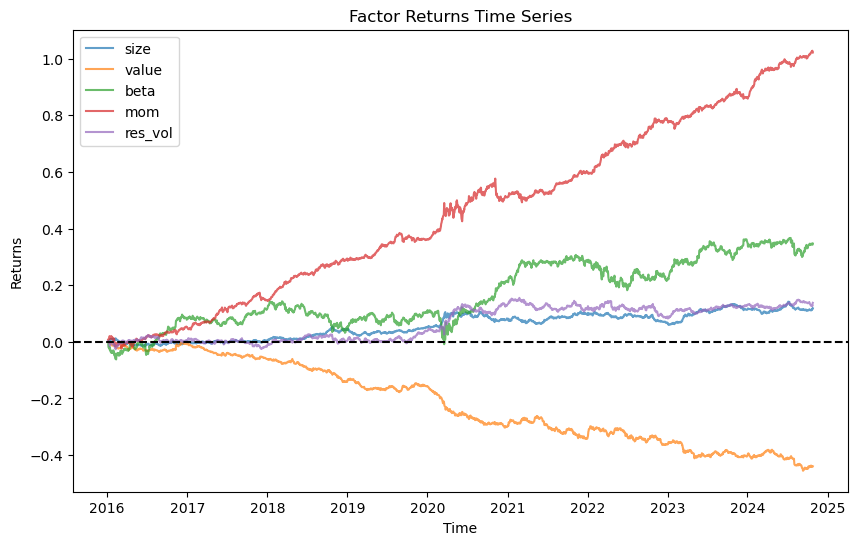

In [27]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(history_betas_df.drop(columns='mkt').cumsum(), label=history_betas_df.drop(columns='mkt').columns, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='dashed')

# Config
plt.title('Factor Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.show()

In [24]:
# Now the Results

results = fama_macbeth_significance_test(history_betas_df)

results.round(3)

,Mean Gamma,Std Error,t-stat,p-value
mkt,0.001,0.0,2.642,0.008
size,0.000,0.0,1.411,0.158
value,-0.000,0.0,-3.902,0.000
beta,0.000,0.0,1.542,0.123
mom,0.000,0.0,5.982,0.000
res_vol,0.000,0.0,1.161,0.246


In [25]:
history_betas_df.to_csv(r'..\additional_data\barra_factor_returns.csv')